In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.cluster import KMeans
from sklearn.metrics import mean_squared_error, r2_score
from flask import Flask, jsonify, request
import joblib


In [17]:
# Carregar os dados
data = pd.read_csv("data.csv") 
print(data.head())


   Unnamed: 0  year  month uf_acronym   type  number_of_consumers  consumption
0           0  2004      1         RO  total                  NaN    112812.00
1           1  2004      1         AC  total                  NaN     34840.05
2           2  2004      1         AM  total                  NaN    274773.00
3           3  2004      1         RR  total                  NaN     31695.63
4           4  2004      1         PA  total                  NaN   1011353.04


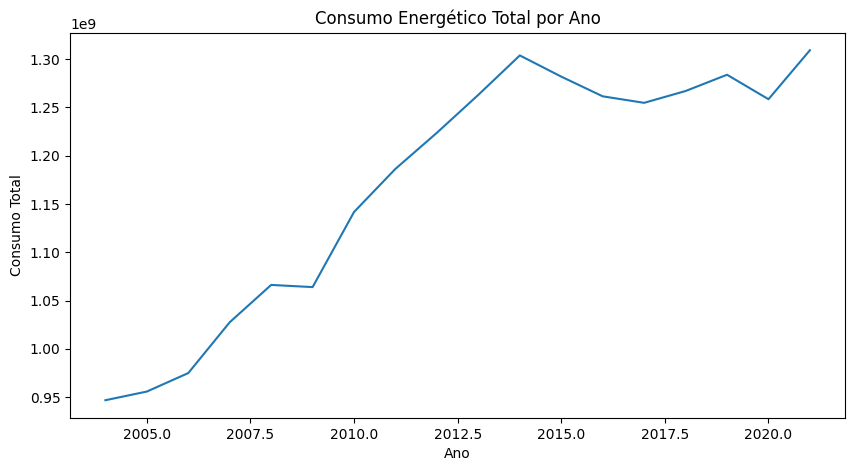

In [18]:
# Agrupar por ano e somar o consumo
yearly_consumption = data.groupby('year')['consumption'].sum()

plt.figure(figsize=(10, 5))
sns.lineplot(x=yearly_consumption.index, y=yearly_consumption.values)
plt.title("Consumo Energético Total por Ano")
plt.xlabel("Ano")
plt.ylabel("Consumo Total")
plt.show()


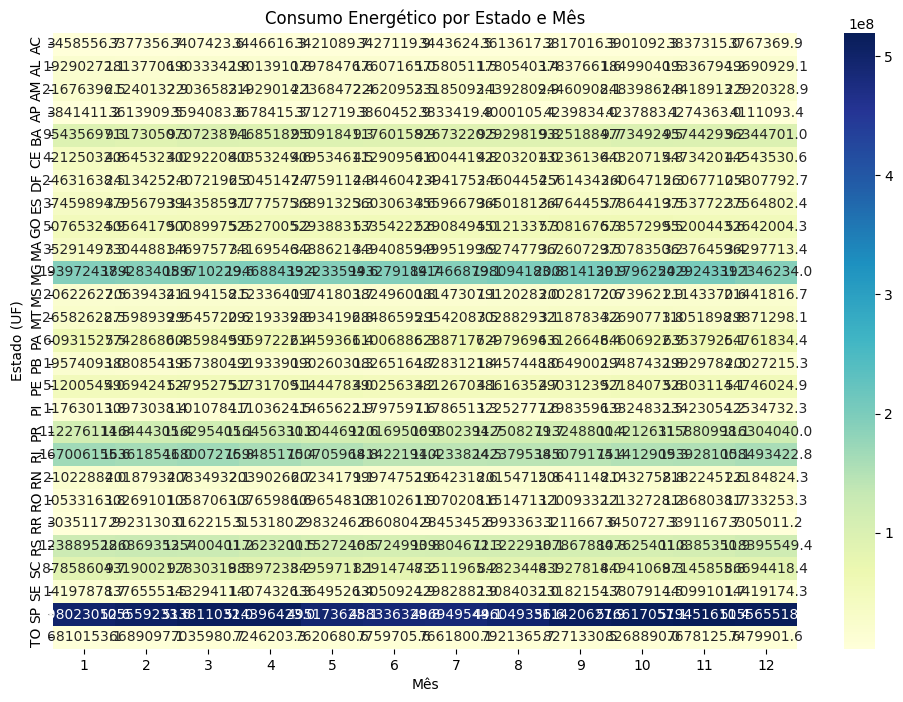

In [19]:
# Criar uma tabela pivô para o heatmap
heatmap_data = data.pivot_table(values='consumption', index='uf_acronym', columns='month', aggfunc='sum')

# Plotar mapa de calor
plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data, cmap="YlGnBu", annot=True, fmt=".1f")
plt.title("Consumo Energético por Estado e Mês")
plt.xlabel("Mês")
plt.ylabel("Estado (UF)")
plt.show()


In [27]:
# Selecionar variáveis independentes e dependente
X = data[['year', 'month', 'number_of_consumers']]
y = data['consumption']

# Dividir em dados de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [31]:
import numpy as np

# Certifique-se de que X_train e y_train sejam arrays unidimensionais do NumPy
x = np.array(X_train).flatten()  # Transforma X_train em um vetor unidimensional
y = np.array(y_train).flatten()  # Transforma y_train em um vetor unidimensional

# Calcula a média de x e y
x_mean = np.mean(x)
y_mean = np.mean(y)

# Calcula os coeficientes da regressão
numerador = np.sum((x - x_mean) * (y - y_mean))
denominador = np.sum((x - x_mean) ** 2)
slope = numerador / denominador  # Coeficiente angular (m)
intercept = y_mean - (slope * x_mean)  # Intercepto (b)

# Exibe os coeficientes
print(f"Coeficiente angular (m): {slope}")
print(f"Intercepto (b): {intercept}")

# Fazer previsões usando a equação da linha de regressão
y_pred = slope * x + intercept

# Exemplo de visualização dos resultados
import matplotlib.pyplot as plt

plt.scatter(x, y, color='blue', label='Dados Originais')
plt.plot(x, y_pred, color='red', label='Linha de Regressão')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.show()


ValueError: operands could not be broadcast together with shapes (83979,) (27993,) 